This Notebook is to compare the mean radius column (NaN) values which is calculated using Simple Imputer strategy
mean and median imputation. Histogram is used for the visualization.

Author : Sangeetha Vijayam
Date : 14-Feb-2025

In [1]:
# import required libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

Approach:
Load the Breast Cancer Dataset.


Introduce Missing Values into the 'mean radius' column.


Apply Mean Imputation using SimpleImputer.
Apply Median Imputation using SimpleImputer.
Compare the Results by visualizing the distributions.

In [2]:
# Loading Breast Cancer Dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Display statistics
print(df['mean radius'].describe())

# Set NaNs in 2 random rows of 'mean radius'
np.random.seed(42)
rows_to_null = np.random.choice(df.index, size=2, replace=False)
df.loc[rows_to_null, 'mean radius'] = np.nan

# Display rows with missing values
print("\nRows with Introduced Missing Values:")
print(df.loc[rows_to_null, ['mean radius']])

count    569.000000
mean      14.127292
std        3.524049
min        6.981000
25%       11.700000
50%       13.370000
75%       15.780000
max       28.110000
Name: mean radius, dtype: float64

Rows with Introduced Missing Values:
     mean radius
204          NaN
70           NaN


In [3]:
# Mean Imputation
imputer_mean = SimpleImputer(strategy='mean')
df_mean_imputed = df.copy()
df_mean_imputed['mean radius'] = imputer_mean.fit_transform(df[['mean radius']])
print("\nAfter Median Imputation:")
print(df_mean_imputed.loc[rows_to_null, ['mean radius']])


After Median Imputation:
     mean radius
204    14.121727
70     14.121727


In [4]:
# Median Imputation
imputer_median = SimpleImputer(strategy='median')
df_median_imputed = df.copy()
df_median_imputed['mean radius'] = imputer_median.fit_transform(df[['mean radius']])

# Compare Results
print("\nAfter Meadian Imputation:")
print(df_median_imputed.loc[rows_to_null, ['mean radius']])



After Meadian Imputation:
     mean radius
204        13.37
70         13.37


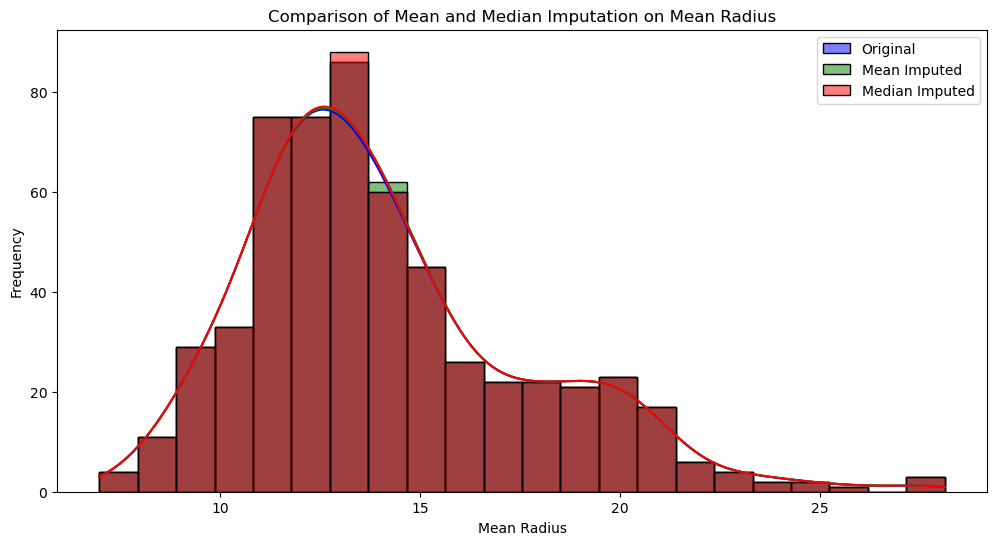

In [5]:
# Visualize the distributions for comparison
plt.figure(figsize=(12, 6))
sns.histplot(df['mean radius'].dropna(), color='blue', label='Original', kde=True, alpha=0.5)
sns.histplot(df_mean_imputed['mean radius'], color='green', label='Mean Imputed', kde=True, alpha=0.5)
sns.histplot(df_median_imputed['mean radius'], color='red', label='Median Imputed', kde=True, alpha=0.5)
plt.title('Comparison of Mean and Median Imputation on Mean Radius')
plt.xlabel('Mean Radius')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Interpretation of the Plot:
This histogram compares the distributions of the 'mean radius' feature in three different scenarios:

Original (Blue) – The distribution of the original data without any imputation.
Mean Imputed (Green) – The distribution after imputing missing values using the mean.
Median Imputed (Red) – The distribution after imputing missing values using the median.

Impact of Mean and Median Imputation on Distribution:

Mean Imputation (Green):
The green bars are concentrated near the peak of the original distribution, aligning closely with the mean value.
This results in a slight overrepresentation at the center of the distribution, slightly affecting the natural spread and reducing variability.
The shape of the distribution is more preserved than median imputation, but it may introduce bias if the data is skewed.

Median Imputation (Red):
The red bars are also concentrated near the peak but appear more localized compared to mean imputation.
It retains the distribution's central tendency but leads to a slight distortion of the original shape.
Median imputation is less sensitive to outliers, so it maintains robustness, especially if the data has skewness or outliers.

This plot confirms that

Median Imputation is generally more robust because it is less affected by outliers and skewness, preserving the central tendency without overly distorting the distribution.

Mean Imputation preserves the overall shape better but may introduce bias, especially if the data is skewed.
In this case, since the original distribution is slightly right-skewed, Median Imputation is likely a better choice as it preserves the skewness without pulling the distribution towards the mean.

Conclusion:
We should choose Median Imputation if the data has outliers or skewness.
We should choose Mean Imputation if the data is normally distributed without extreme outliers.